In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'sklearn'

## Testing with GradientBoost from XGBoost

In [ ]:
df = pd.read_csv('../dataset/Australia_Grand_Prix_2025_data.csv')

In [ ]:
df

,driver_number,driver,year,event,team,FP1_air_temp,FP1_humidity,FP1_rainfall,FP1_pressure,FP1_wind_speed,...,Q_total_time,R_air_temp,R_humidity,R_rainfall,R_pressure,R_wind_speed,R_wind_direction,R_track_temp,R_total_time,race_position
0,1,VER,2024,Australia Grand Prix,Red Bull Racing,18.469136,61.012346,0.0,1023.564198,1.262963,...,98.397042,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,83.287416,R
1,2,SAR,2024,Australia Grand Prix,Williams,18.469136,61.012346,0.0,1023.564198,1.262963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,RIC,2024,Australia Grand Prix,RB,18.469136,61.012346,0.0,1023.564198,1.262963,...,93.306416,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,84.694672,12
3,4,NOR,2024,Australia Grand Prix,McLaren,18.469136,61.012346,0.0,1023.564198,1.262963,...,92.064222,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,83.213935,3
4,10,GAS,2024,Australia Grand Prix,Alpine,18.469136,61.012346,0.0,1023.564198,1.262963,...,91.227155,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,85.131864,13
5,11,PER,2024,Australia Grand Prix,Red Bull Racing,18.469136,61.012346,0.0,1023.564198,1.262963,...,97.995342,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,84.059169,5
6,14,ALO,2024,Australia Grand Prix,Aston Martin,18.469136,61.012346,0.0,1023.564198,1.262963,...,91.118187,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,84.456398,8
7,16,LEC,2024,Australia Grand Prix,Ferrari,18.469136,61.012346,0.0,1023.564198,1.262963,...,97.876833,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,83.144135,2
8,18,STR,2024,Australia Grand Prix,Aston Martin,18.469136,61.012346,0.0,1023.564198,1.262963,...,91.553222,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,84.690517,6
9,20,MAG,2024,Australia Grand Prix,Haas F1 Team,18.469136,61.012346,0.0,1023.564198,1.262963,...,90.310085,20.622222,44.451389,0.0,1020.601389,0.953472,154.784722,38.402083,84.584562,10


Columns: ['Driver', 'Qualifying_Time', 'Race_Time', 'Weather_AirTemp', 'Weather_TrackTemp', 'Weather_Humidity', 'Weather_WindSpeed', 'Weather_Rainfall', 'Weather_Pressure', 'team', 'FP1_total_time', 'FP2_total_time', 'FP3_total_time', 'Year', 'EventName']
Shape before: (2701, 15)
Features: ['Qualifying_Time', 'Weather_AirTemp', 'Weather_TrackTemp', 'Weather_Humidity', 'Weather_WindSpeed', 'Weather_Rainfall', 'Weather_Pressure', 'FP1_total_time', 'FP2_total_time', 'FP3_total_time', 'Year']
Shape after: (2701, 11)
Rows: 2701
Missing in features:
 Qualifying_Time        0
Weather_AirTemp        0
Weather_TrackTemp      0
Weather_Humidity       0
Weather_WindSpeed      0
Weather_Rainfall       0
Weather_Pressure       0
FP1_total_time         0
FP2_total_time       108
FP3_total_time         0
Year                   0
dtype: int64
Missing in target: 0
Target stats:
 count    2701.000000
mean       91.098067
std        15.239019
min        79.813000
25%        82.244000
50%        83.666000

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\srish\AppData\Local\Temp\ipykernel_31428\1563505142.py:2: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("C:\msys64\home\srish\DDSC-F1\dataset\Australian_Grand_Prix_data.csv")


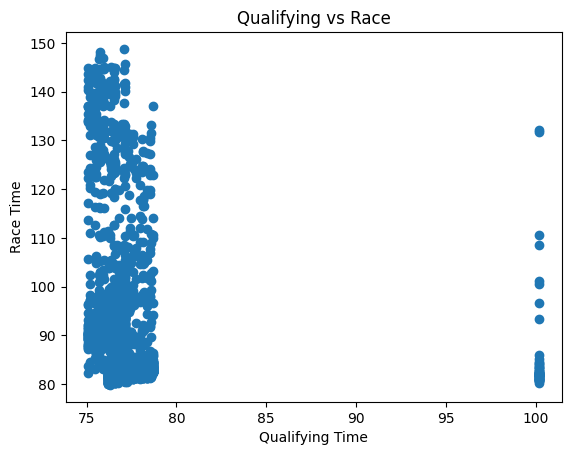

Saved cleaned data


'#Drop columns starting with \'R\' (except we keep y separately) and drop non-numeric columns\nX = df.loc[:, ~df.columns.str.startswith("R")].drop(columns=[\'event\', \'team\', \'driver\'], errors=\'ignore\')\nX = X.select_dtypes(include=[np.number])  # Keep only numeric columns\ny = df[\'Race_Time\'] #there was no clumn named \'R_total_time\'\n\n# Remove rows where target is NaN\nvalid_idx = y.notna()\nX = X[valid_idx]\ny = y[valid_idx]\n\nprint(f"Features: {X.columns.tolist()}")\nprint(f"Shape: {X.shape}")'

In [ ]:
#Data cleaning
df = pd.read_csv("C:\msys64\home\srish\DDSC-F1\dataset\Australian_Grand_Prix_data.csv")

# checking columns
print("Columns:", df.columns.tolist()) #shows column names
print("Shape before:", df.shape)

# drop empty rows
df = df.dropna(how='all') #only removes rows that are completely empty

# prepare features
X = df.loc[:, ~df.columns.str.startswith("R")].drop(columns=['team', 'Driver'], errors='ignore')
X = X.select_dtypes(include=[np.number])

# prepare target
y = df['Race_Time']

# remove missing target
valid_idx = y.notna()
X = X[valid_idx]
y = y[valid_idx]

# summary features
print("Features:", X.columns.tolist())
print("Shape after:", X.shape)
print("Rows:", len(y))

# check missing values
print("Missing in features:\n", X.isna().sum())
print("Missing in target:", y.isna().sum())

# describe data
print("Target stats:\n", y.describe())
print("Features stats:\n", X.describe())

# example plot
plt.scatter(X['Qualifying_Time'], y)
plt.xlabel('Qualifying Time')
plt.ylabel('Race Time')
plt.title('Qualifying vs Race')
plt.show()

# save cleaned data
cleaned_df = X.copy()
cleaned_df['Race_Time'] = y
cleaned_df.to_csv("Australia_Grand_Prix_2025_cleaned.csv", index=False)
print("Saved cleaned data")



'''#Drop columns starting with 'R' (except we keep y separately) and drop non-numeric columns
X = df.loc[:, ~df.columns.str.startswith("R")].drop(columns=['event', 'team', 'driver'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
y = df['Race_Time'] #there was no clumn named 'R_total_time'

# Remove rows where target is NaN
valid_idx = y.notna()
X = X[valid_idx]
y = y[valid_idx]

print(f"Features: {X.columns.tolist()}")
print(f"Shape: {X.shape}")'''

In [24]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42, verbosity=0)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} seconds")
print(f"MAE: {mae:.4f} seconds")
print(f"R² Score: {r2:.4f}")

NameError: name 'train_test_split' is not defined

In [ ]:
df.info()
df.isna().sum().sort_values(ascending=False)
